In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Assignment 3
## Meyer's pg. 330

### 1
#### a. $x(t+1)=x(t)^2+x(t)+t$, $x(0)=1$

In [2]:
xold=1
vals=np.zeros(4, dtype=np.int)
for i in range(0,4):
    vals[i]=xold**2+xold+i
    xold=vals[i]
print(vals)

[   2    7   58 3425]


#### b. $x(t+1)=x(t)+t^2+t+1$, $x(0)=-1$

In [3]:
xold=-1
vals=np.zeros(4, dtype=np.int)
for i in range(0,4):
    vals[i]=xold+i**2+i+1
    xold=vals[i]
print(vals)

[ 0  3 10 23]


#### c. $x(t+1)=x(t)+\frac{t}{x(t)}$, $x(0)=1$

In [4]:
xold=1
vals=np.zeros(4, dtype=np.int)
for i in range(0,4):
    vals[i]=xold+i/xold
    xold=vals[i]
print(vals)

[1 2 3 4]


### 3.
#### a. $x(t+1)=x(t)+1$, $x_0=-1,0,1$ 

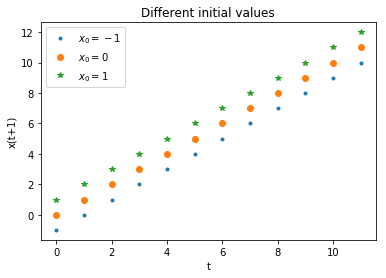

In [5]:
v=np.zeros((3,12), dtype=np.int)
for xold in range(-1,2):
    old=xold
    v[old+1,0]=xold
    for i in range(0,11):
        v[xold+1,i+1]=old+1
        old=v[xold+1,i+1]
x=range(0,12)
plt.plot(x,np.transpose(v[0]), '.',label="$x_0=-1$")
plt.plot(x,np.transpose(v[1]), 'o',label="$x_0=0$")
plt.plot(x,np.transpose(v[2]), '*',label="$x_0=1$")
plt.xlabel('t')
plt.ylabel('x(t+1)')
plt.title("Different initial values")
plt.legend()
plt.savefig('intl.png')
plt.show()

#### b. $x(t+1)=x(t)+a$, $x_0=1$, $a=-1,0,1$

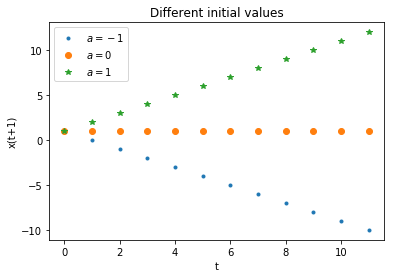

In [6]:
v=np.zeros((3,12), dtype=np.int)
for a in range(-1,2):
    old=1
    v[a+1,0]=old
    for i in range(0,11):
        v[a+1,i+1]=old+a
        old=v[a+1,i+1]
x=range(0,12)
plt.plot(x,np.transpose(v[0]), '.',label="$a=-1$")
plt.plot(x,np.transpose(v[1]), 'o',label="$a=0$")
plt.plot(x,np.transpose(v[2]), '*',label="$a=1$")
plt.xlabel('t')
plt.ylabel('x(t+1)')
plt.title("Different initial values")
plt.legend()
plt.savefig('const.png')
plt.show()

### Eulers Method W/Slope Field
Solve $\dot{y}=y(1-y/3)$ using Eulers method with varying $y_0$ over a slope field.

In [7]:
def fEuler(t,y):
    return y*(1-y/3)

def euler(y0, t0, tf, dt):
    t, y = t0, y0
    points = [[t,y]]
    while t <= tf:
        y += dt*fEuler(t,y)
        t += dt               
        points.append([t,y])
    return np.array(points)

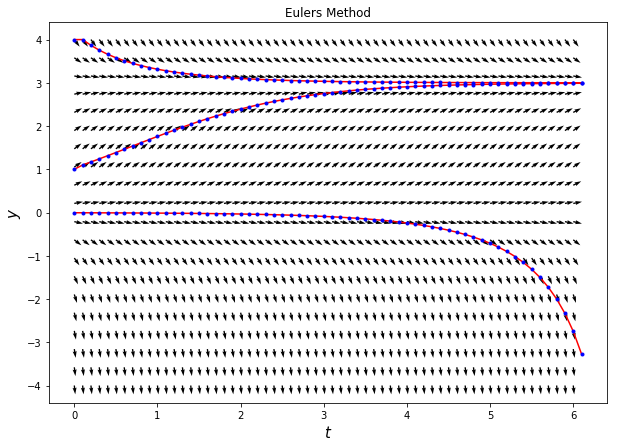

In [8]:
t0, tf, dt = 0, 6, 1e-1 #Time from 0 to 6,  in steps of .1. Decrease dt for accuracy at cost of more computations.
ymin, ymax = -4, 4  

p1 = euler(1, t0, tf, dt)
plt.figure(figsize=[10,7])
plt.plot(p1[:,0],p1[:,1],'r-',p1[:,0],p1[:,1],'b.') #Plot with initl condition y_0=1

p2 = euler(4, t0, tf, dt)
plt.plot(p2[:,0],p2[:,1],'r-',p2[:,0],p2[:,1],'b.') #Plot with initl condition y_0=4

p3 = euler(-.005, t0, tf, dt)
plt.plot(p3[:,0],p3[:,1],'r-',p3[:,0],p3[:,1],'b.') #Plot with initl condition y_0=-.005 -> Anthing ''more negative'' decreases too fast to see on the plot

# Construct Slope Field
npts = int((tf-t0)/dt+1)     # Number of time steps taken
t = np.linspace(t0,tf,npts)     # Time Grid
y = np.linspace(ymin,ymax,20)      # Solution Data Grid
# Meshgrid Creates Coordinate Matrices from Coordinate Vectors
tt,yy = np.meshgrid(t,y)
# Slope-field
u = 1           # 1D so u does not vary
v = fEuler(t,yy)     #MY EULER SLOPE FIELD
# Normalize the arrow lengths
N = np.sqrt(u**2+v**2)
u, v = u/N, v/N
# Construct the Slope-field (Notice any Equilibrium Solutions)
plt.quiver(tt,yy,u,v)
plt.xlabel('$t$',size=15)
plt.ylabel('$y$',size=15);
plt.title("Eulers Method") 
plt.savefig('euler.png') #Save as a PNG

### Runge-Kutta Method
Solve $\dot{y}=(4-y)(2-y)^3$ with varying $y_0$

In [14]:
def fRunge(t,y):
    return (4-y)*(2-y)**3

def runge(y0, t0, tf, dt):
    t, y = t0, y0
    k1,k2,k3,k4 = 0,0,0,0 #Initialize the four sub steps to zero.
    points = [[t,y]]
    while t <= tf:
        #Compute each of the four sub steps at this time and y value. Must compute in order because of backwards dependence
        k1=fRunge(t,y)
        k2=fRunge(t+dt/2,y+k1*dt/2)
        k3=fRunge(t+dt/2,y+k2*dt/2)
        k4=fRunge(t+dt,y+k3*dt)
        #Substitute for euler form with Runge-Kutta form, y_new=y+h/6(k1+2k2+2k3+k4)
        y += (dt/6)*(k1+2*k2+2*k3+k4)
        t += dt
        points.append([t,y])
    return np.array(points)

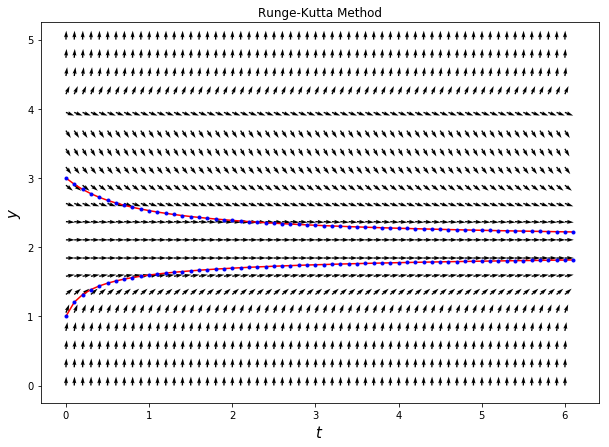

In [16]:
t0, tf, dt = 0, 6, 1e-1 #Time from 0 to 6 with a step of .1, lower step increases accuracy and computation cost
ymin, ymax = 0, 5  

p1 = runge(1, t0, tf, dt)
plt.figure(figsize=[10,7])
plt.plot(p1[:,0],p1[:,1],'r-',p1[:,0],p1[:,1],'b.') #Plot solution with y_0=1

p2 = runge(3, t0, tf, dt)
plt.plot(p2[:,0],p2[:,1],'r-',p2[:,0],p2[:,1],'b.') #Plot solution with y_0=3

#Any y_0>4 increases too fast to look at the plot.

# Construct Slope Field
npts = int((tf-t0)/dt+1)     # Number of time steps taken
t = np.linspace(t0,tf,npts)     # Time Grid
y = np.linspace(ymin,ymax,20)      # Solution Data Grid
# Meshgrid Creates Coordinate Matrices from Coordinate Vectors
tt,yy = np.meshgrid(t,y)
# Slope-field
u = 1           # 1D so u does not vary
v = fRunge(t,yy)     #MYRUNGE METHOD
# Normalize the arrow lengths
N = np.sqrt(u**2+v**2)
u, v = u/N, v/N
# Construct the Slope-field (Notice any Equilibrium Solutions)
plt.quiver(tt,yy,u,v)
plt.xlabel('$t$',size=15)
plt.ylabel('$y$',size=15);
plt.title("Runge-Kutta Method")
plt.savefig('runge.png') #Save as PNG